# Environment Setup and Test Case

This file is organized in steps, which you can follow to setup environment for **python** with **Jupyter**. After finished all the steps you should be able to create notebooks, play with your code in it, and commit your updates to the **CSEVCS** server. This is a workflow we think will benefit you not only in this course but also in your other tasks.

## STEP 0 : Activate CSEVCS Account

This step is very easy, however, very important. We cannot put you in the course's project on **CSEVCS** before you login at least once. So, login on [**CSEVCS**](https://csevcs.case.edu) with you **case id** as soon as possible. It only take a few seconds.

## STEP 1 : Install Python and Jupyter

This is a complex environment related to a lot of packages. So it is not wise to install all the depedencies manually. As on Jupyter's [official webpage](http://jupyter.org/install) The simplest way to do it at once is through [**Anaconda**](https://www.anaconda.com/downloads). Download and install it would give a complete python environment, including **Jupyter** and all depedencies. But if you already have python installed and don't want multiple versions in you system. You can install **Jupyter** through **pip/pip3** with one command:

```bash
>> pip3 install jupyter
```

# STEP 2 : Launch Jupyter Notebook

Run **Jupyter** is as simple as one command in you shell (or PowerShell in Windows):

```bash
>> jupyter notebook
```

One thing to be notice here is you have to put **jupyter** excutive (**jupyter.exe** in windows) under your search path (environment variable **PATH**). Normally, this would be done automatically. According to your system's condition it maybe a problem.

Then you would see an interface as following:

![JupyterInterface.png](img/JupyterInterface.png)

It works like a file explorer (a significantly weak one). The default folder is the path in your shell when you run the command above to launch **Jupyter**. Now, you can use button **New** at up-right corner to create new notebook with specified kernel (we use **python** here).

After you created a new notebook or opened this notebook, you will see a interface close to an editor. But is composed by cells. Usually, we use two types of them : **Markdown** and **code**. **Markdown** shell support both **Markdown** gramma ([reference](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)) and **LaTeX** for math formula ([reference](https://en.wikibooks.org/wiki/LaTeX/Mathematics)) between symbol pair '$'. For example,

```
$E = m C^2$
``` 

would be interpreted as $E = m C^2$. After your editing, you can press [SHIFT + ENTER] to *run* the cell. In the case of **markdown**, it would show the preview of this cell; while, **code** cell would be excuted in current workspace. Double click on the preview of **markdown** cell lead to editing mode of it.

**Jupyter** also support keyboard shortcut. It calls it **command mode**. You enter the **command mode** by press [ESC] in editing mode. Commands supported in keyboard shortcut you can find in the help when you press [H] in **command mode**.

## STEP 3 : Run the Test Case

Now we'll run some simple python code to test your environment. Our task to draw a PDF (probability density function) curve for Gaussian distribution.

At first you need to install package 'numpy' and 'matplotlib' for your python. This two are very helpful in the future. You can do it through **pip/pip3**, which is the simplest way.

```
>> pip3 install numpy matplotlib
```

To test whether or not you have successfully install them, you can run following cell by pressing [SHIFT + ENTER] in following cell:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

If there is no error message showed up, you are good. Then we create a function to calculate probability density of Gaussian distribution with given paramters according to its mathematical definition:

$ f(x, \mu, \sigma) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $

In [2]:
def gausspdf(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

Run above shell, function **gaussdef** is defined in our workspace. Then, we can call it to calculate PDF of gaussian in other cells. A good practice is to setup parameter in a separate cell that you can modify it easily later. In our case, there are only two parameters : $\mu$ (*mu*) and $\sigma$ (*sigma*).

In [3]:
mu    = 0 # mean of distribution
sigma = 1 # standard variance of distribution
pltrg = 3 # plot range

By default, you plot a standard gaussian distribution $\mathit{N}(0,1)$ in range of $[-3, 3]$.

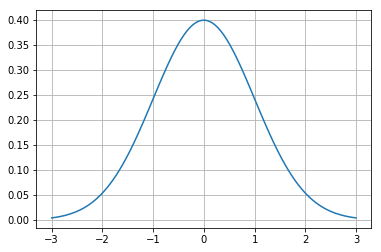

In [4]:
# creata x domain as an array in numpy (100 points)
x = np.linspace(mu - pltrg, mu + pltrg, 100)
# draw plot through package MATPLOTLIB, which close to gramma in MATLAB
plt.plot(x, gausspdf(x, mu, sigma))
plt.grid()
plt.show()

## STEP 4 : Play Around

The simplest thing you can try is modifying parameters in above section and run the parameter setup cell and plot cell again to see the difference. One thing to be noticed is the number on the left side of your **code** cell means its running order in time. In another word, you can run cells in a different order to their position in the notebook. This is a helpful feature, when you have multiple settings or algorithms in your experiment. 

Other than that you can try more interesting things as you like, such as drawing other distributions.

# Neural Network Activation Functions

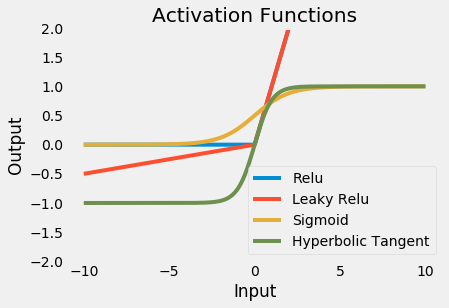

In [5]:
x = np.linspace(-10, 10, 1e3)
plt.style.use('fivethirtyeight')

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    activation = [max([0, element]) for element in x]
    return activation

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha):
    activation = [alpha * element if element < 0 else element for element in x]
    return activation


plt.plot(x, relu(x), label='Relu')
plt.plot(x, leaky_relu(x, alpha=0.05), label='Leaky Relu')
plt.plot(x, sigmoid(x), label = 'Sigmoid')
plt.plot(x, tanh(x), label='Hyperbolic Tangent')
plt.ylim((-2, 2))
plt.legend()
plt.grid()
plt.title('Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

## STEP 5 : Commit Notebook with Git

Currently, I made enough progress for this project. It is a good time to commit a versiom to our **csevcs** server. We'll do this through Git, a free popular software for version control. If you haven't got used to it, there is a very good interactive tutorial on [GitHub](https://try.github.io/levels/1/challenges/1) can help you get basic idea of how it works. Besides, you can find [reference](https://git-scm.com/docs) online.

Here, I'll show a basic workflow to submit your notebook to our **csevcs** server.

In [6]:
import subprocess

def shcmd(cmd):
    print(subprocess.check_output(cmd, shell=True).decode('utf-8'))

Here, I use package *subprocess* and a self-defined function *shcmd* to run shell command inside the notebook. However, we normally run these command in your system's shell. The only difference is you only need statement between quotes (or double quotes) in shell.

The main idea of function *shcmd* above is to run a command in a sub-routine and collect its output in standard output in shell environment.

At very beginning, let's test *shcmd* with a simple command *ls*, which list file structure of current folder.

In [7]:
shcmd('ls -la')

total 988
drwxr-xr-x 1 Will Koehrsen 197609      0 Jan 23 16:35 .
drwxr-xr-x 1 Will Koehrsen 197609      0 Jan 23 16:06 ..
drwxr-xr-x 1 Will Koehrsen 197609      0 Jan 23 16:12 .ipynb_checkpoints
drwxr-xr-x 1 Will Koehrsen 197609      0 Jan 23 16:05 __MACOSX
drwxr-xr-x 1 Will Koehrsen 197609      0 Jan 23 16:05 img
-rw-r--r-- 1 Will Koehrsen 197609  85063 Jan 23 16:35 SetupAndTest.ipynb
-rw-r--r-- 1 Will Koehrsen 197609 908822 Jan 23 16:05 SetupAndTest.pdf



In my condition, there is only one notebook and a folder named 'img' containing images needed for this notebook. If you run last cell in you system may get a different result.

Now, we should at first initialize a local git repository. It can be easily done by command '*git init*'.

In [8]:
# shcmd('git init')

If succeed, you would see an information about repository's location in your system. But, currently, the git just initialized an empty repository. You need following commands to let it keeps track of all the files in current folder now, and makes a commitment.

In [9]:
#shcmd('git add *')
# shcmd("git commit --all -m 'initial commit'")

Now, you have done the part in local side. We need to deal with the remote part in following cells. They basically separate into three steps :

1. find the url of your project repository on **csevcs**
2. add url as a 'remote' in local git repository
3. submit your latest commitment to remote by 'git push' command

For the first step, you need to login your accond on [csevcs](https://csevcs.case.edu/). And check a project named in pattern 'EECS 491 - [YOUR NAME]'. Get into it and turn to tab named 'Repository'. In my case, I get a page as following:

![RepoBeforeSubmit](img/RepoBeforeSubmit.png)

You can find you repository id in the website address. It the string between 'projects' and 'repository'. In my case, it's 'hzhu491'. I made them normally in a pattern of initial letters of first and middle names, last name, and '491', our course code. In rare cases, you have a very long last name, I also make a truncate of it.

The second step is done locally. We need to setup a 'remote', which is an url in git that indicate where you want your repositive sync with online. Here we need command 'git remote add'.

In [10]:
# shcmd('git remote add origin https://csevcs.case.edu/git/hzhu491')

Above command says adding a remote named 'origin' and associate it with the url 'https://csevcs.case.edu/git/hzhu491'. The url here should different corresponding to your own repository id obtained above. If succeed, there is no text feed back. Otherwise, you'll get a long error mssage.

You can list all the remotes in the local repository by 'git remote'.

In [11]:
# shcmd('git remote')

Currently, it should show 'origin' only. Then, we come to the last step that submit your code to *csevcs* server. It can be complete by command 'git push'. If you encounter error in this process, it may need you enter *case id* and *password* in the process at the first time. In this case, you need to run this command in shell before you can run it through python API.

In [12]:
# shcmd('git push origin master')

Congratulations, you have made your first submission! Check your repository online, you should found your submission now. My page looks like:

![RepoAfterSubmit](img/RepoAfterSubmit.png)